In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.datasets import  make_classification
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython import display

import copy
import random
import time

Это игрушечно -исследовательское задание
Перед Вами задача бинарной классификации. Как модель мы будем использывать двуслойный перцептрон.
Изучите, как отрабатывают различные оптимизаторы на этой задаче. Обязательно попробовать  Adam, RMSProp, SGD, L-BFGS. Другие тоже можно

Сделать выводы по полученным результатам.

In [5]:
#  Делаем рандомную задачу бинарной классификации. По умолчанию make_classification порождает объект с 20 признаками. 
# Это значение можно варьировать. И его надо подавать как input_size в моддель
X, Y = make_classification(n_samples=200)

# Делим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

# перегоняем все в торч
x_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)

x_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([160, 20]),
 torch.Size([40, 20]),
 torch.Size([160]),
 torch.Size([40]))

In [7]:
# Cтроим простой перцептрончик: Один линейный слой потом Релу (что это такое, кстати?=)), еще линейный слой и сигмоиду, которая будет выдавать вероятности классов
# hidden size можно варьировать. input_size - кол-во признаков в объекте

class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size

        self.linear1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        hidden = self.linear1(x)
        relu = self.relu(hidden)
        output = self.linear2(relu)
        output = self.sigmoid(output)
        return output

In [44]:
# модель
model = MLP(20, 10)

# Критерий/ функция потерь
criterion = torch.nn.BCELoss()

# Оптимизаторы. Можете потыкать все из торча. обязательно Adam, RMSProp, SGD, L-BFGS
optimizers = (torch.optim.Adam, torch.optim.RMSprop, torch.optim.SGD, torch.optim.LBFGS)
names = ["ADAM", "RMSPROP", "SGD", "LBFGS"]
batch_sizes = [5, 10, 25, 50, 100, 200]
hidden_layers = [2, 5, 10]

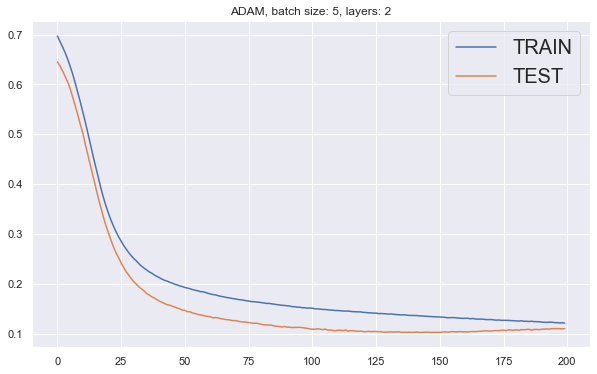

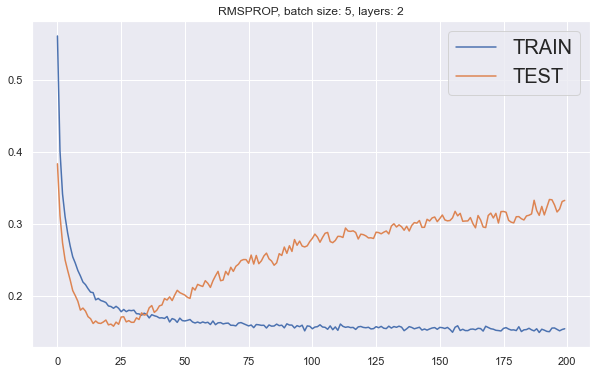

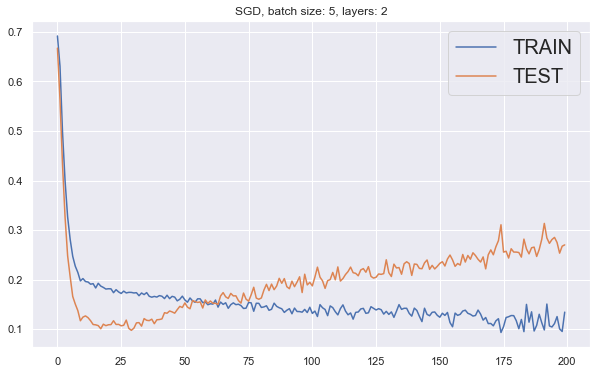

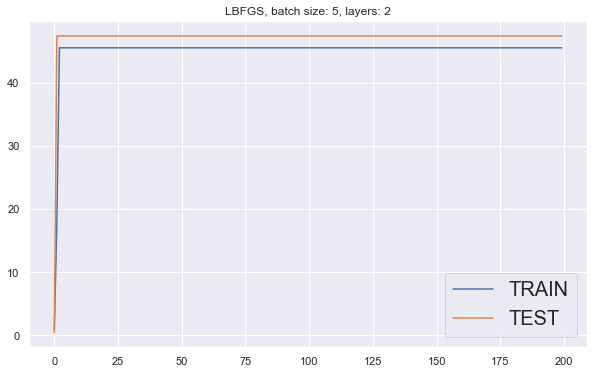

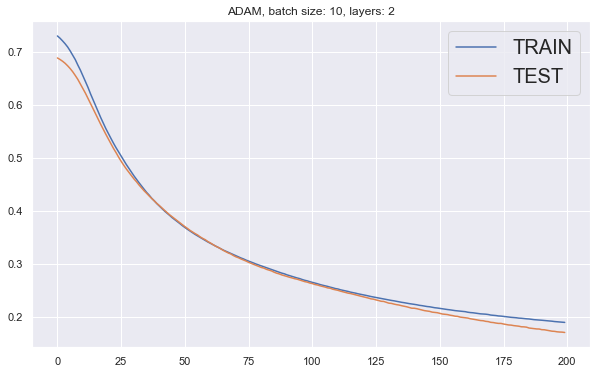

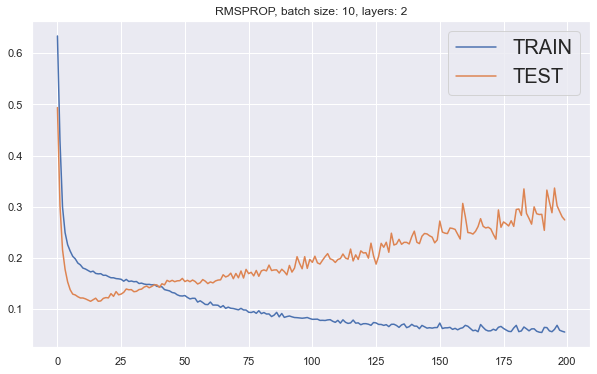

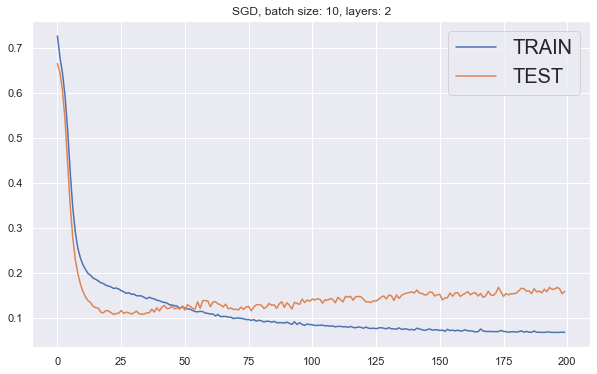

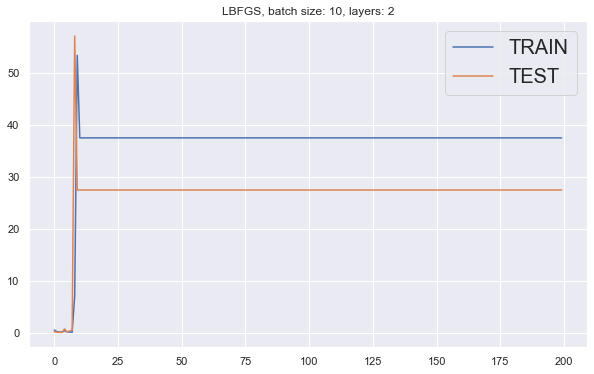

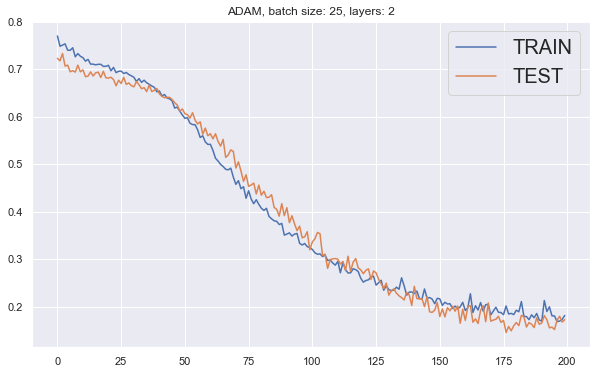

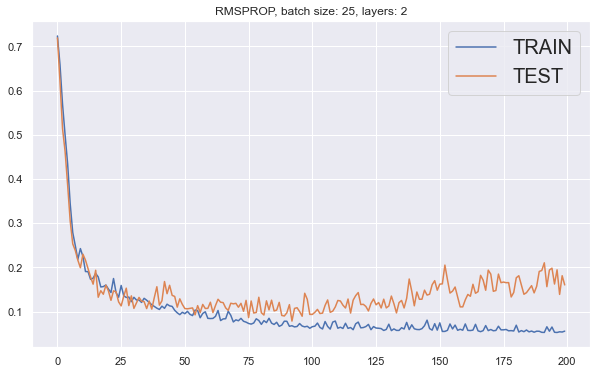

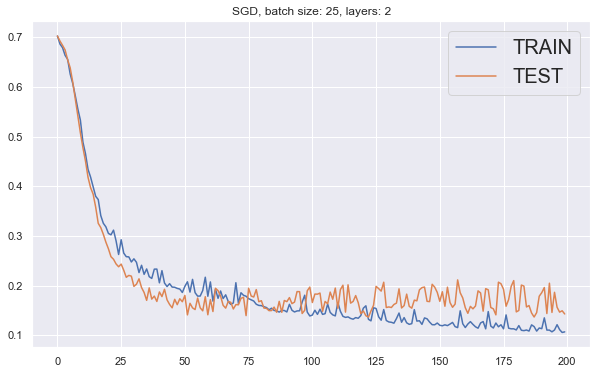

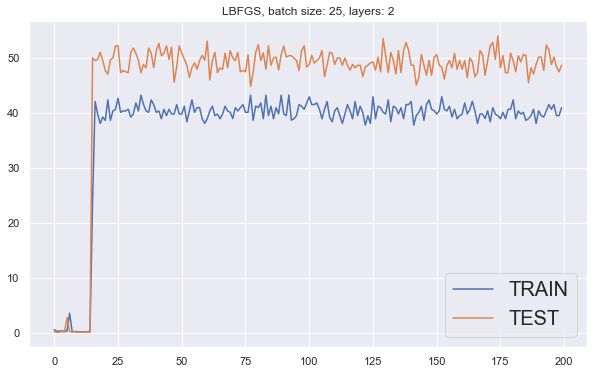

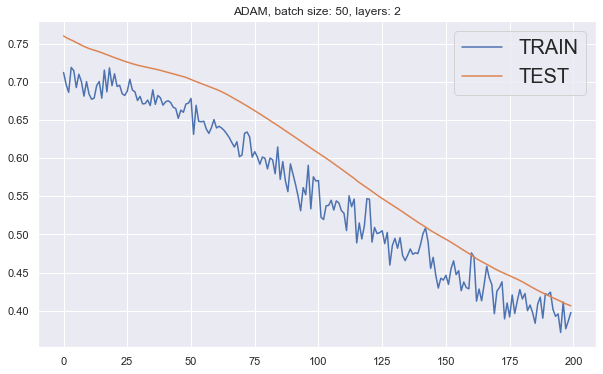

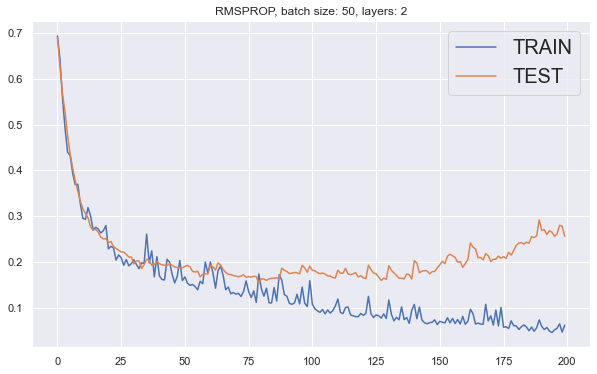

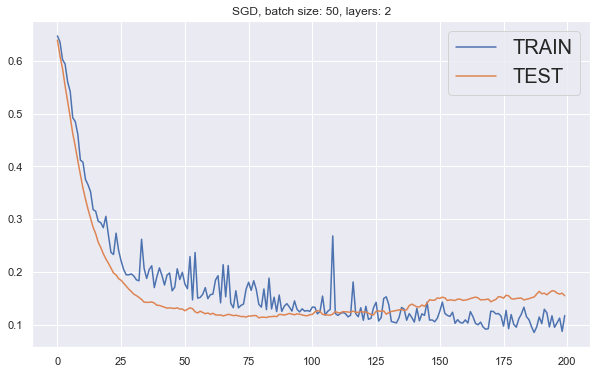

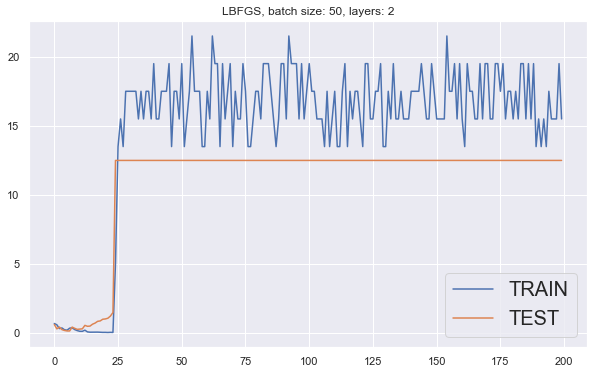

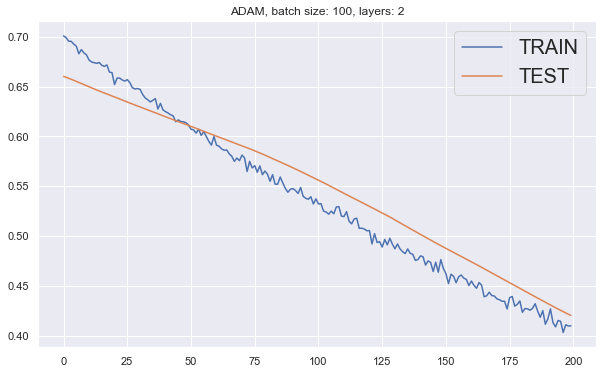

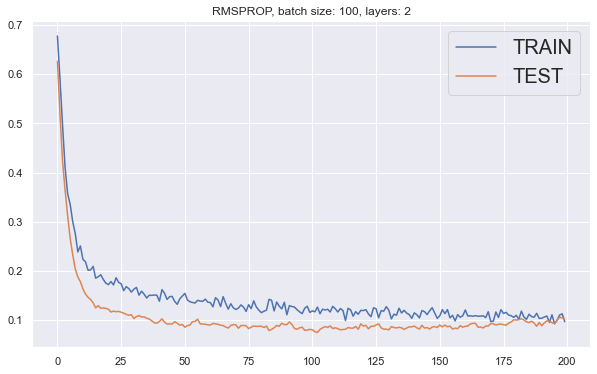

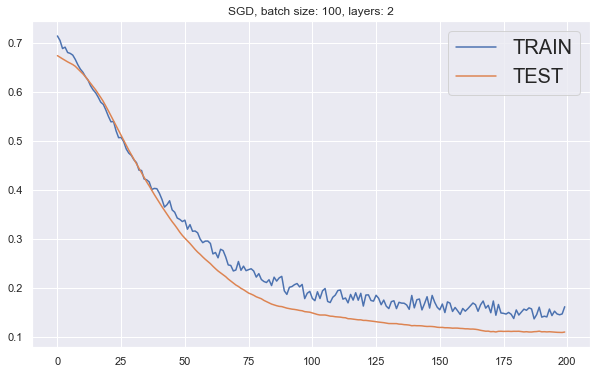

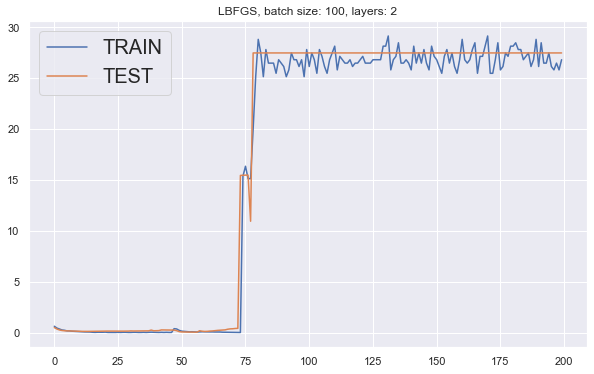

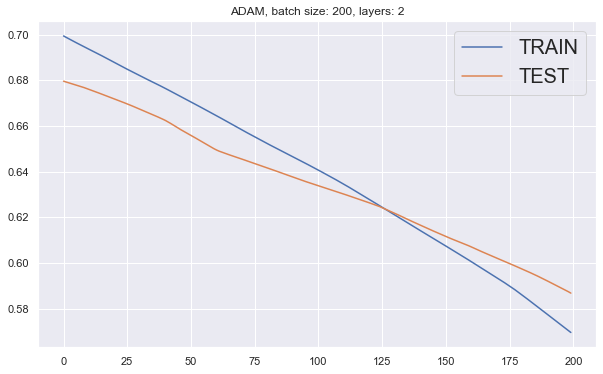

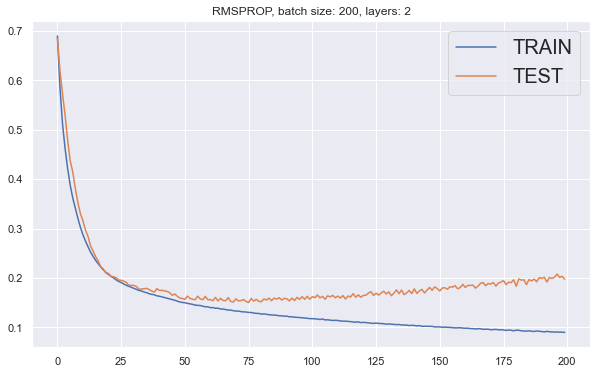

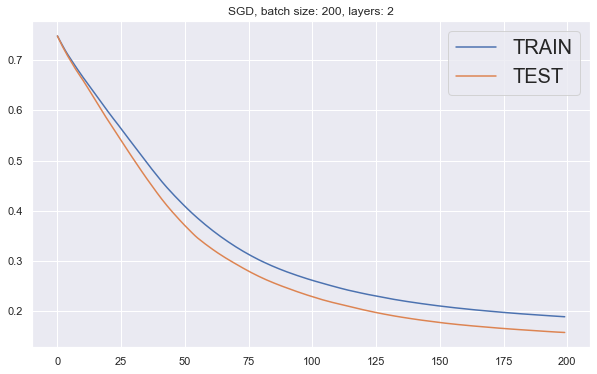

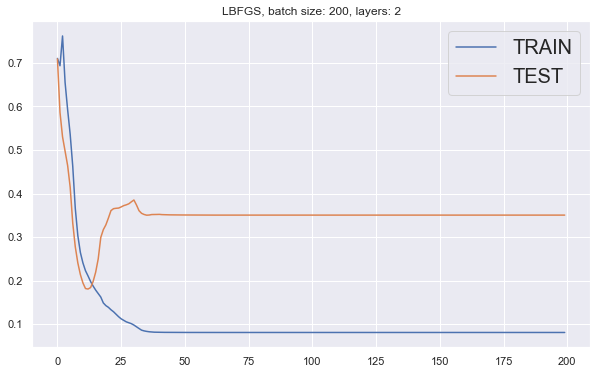

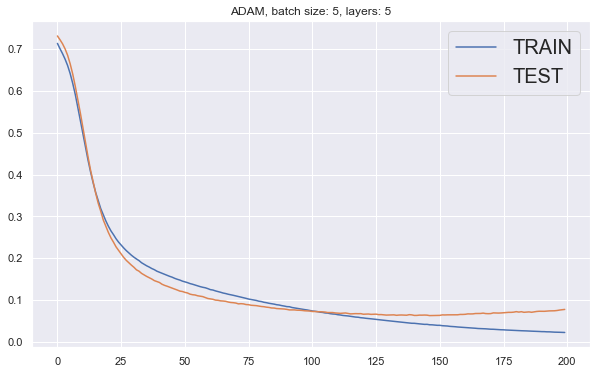

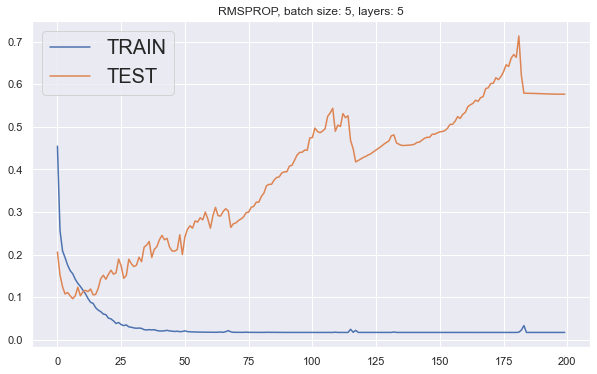

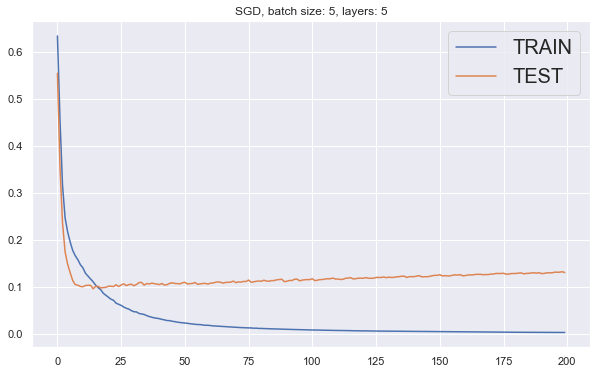

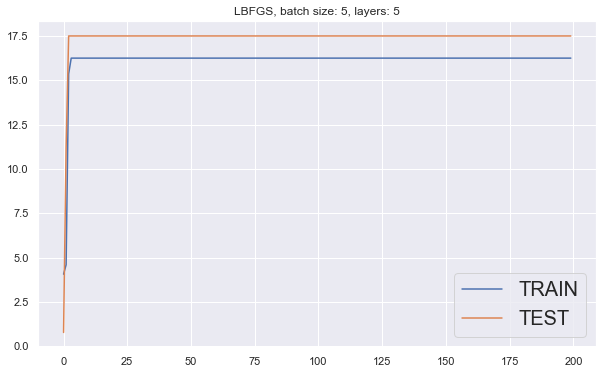

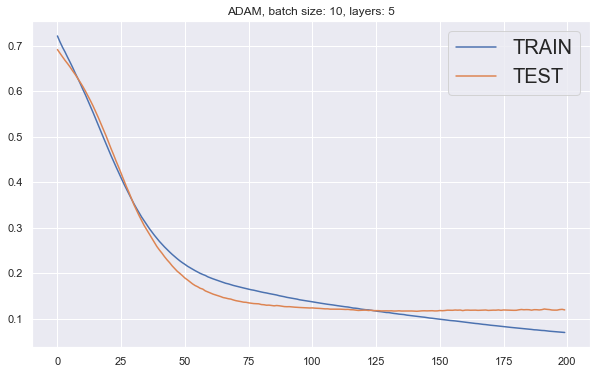

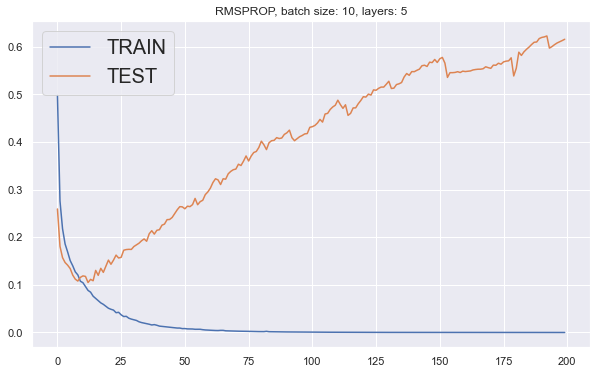

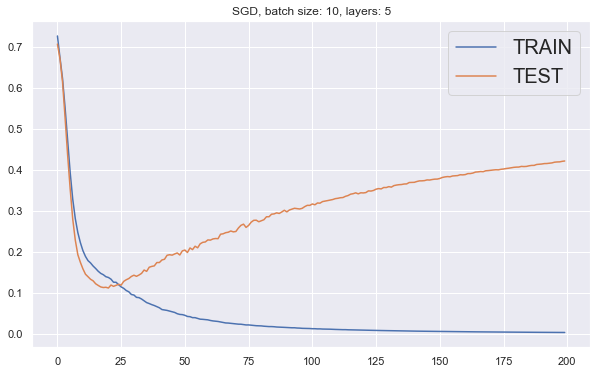

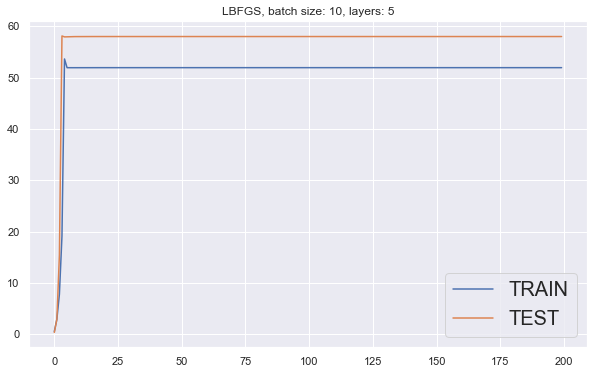

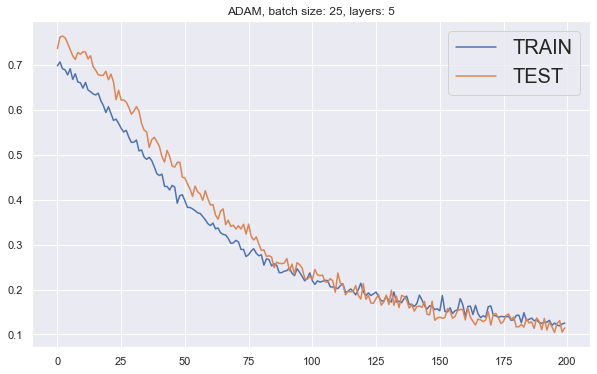

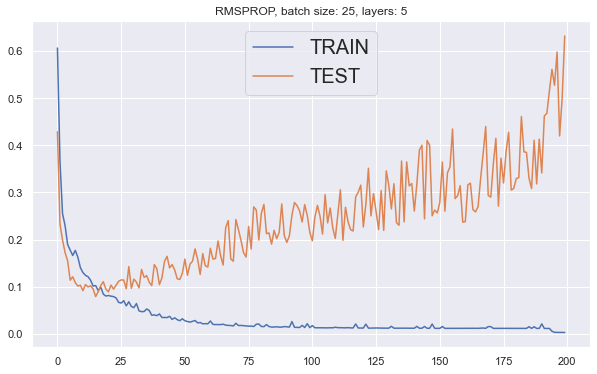

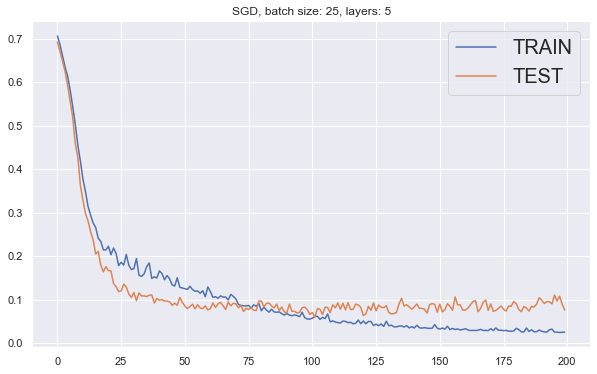

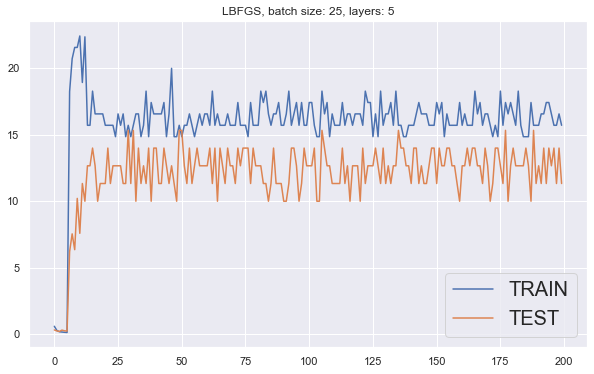

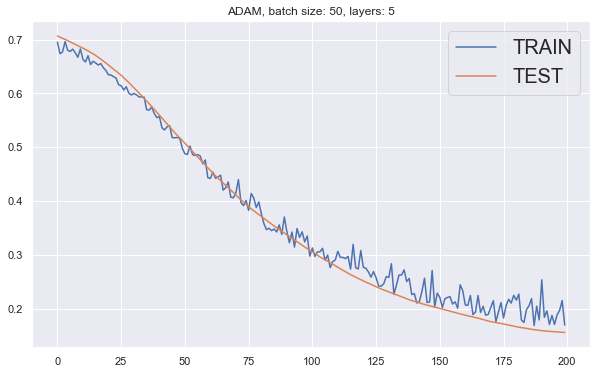

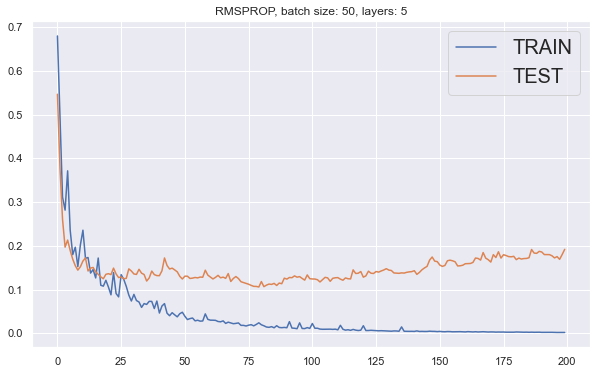

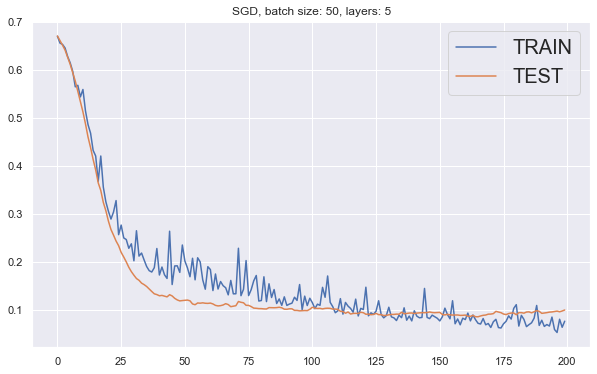

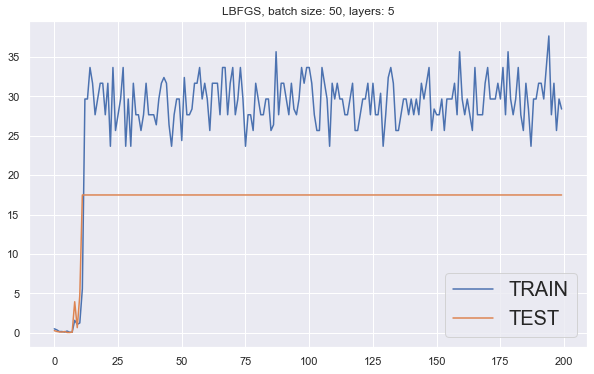

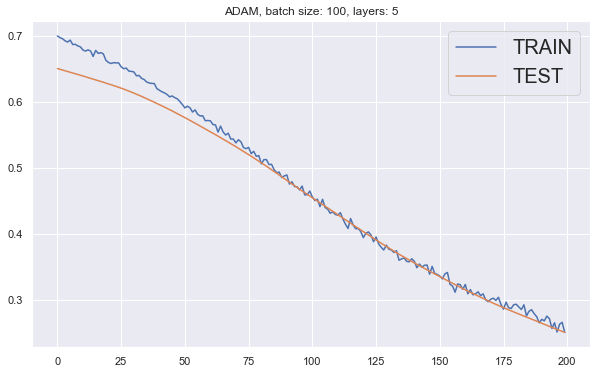

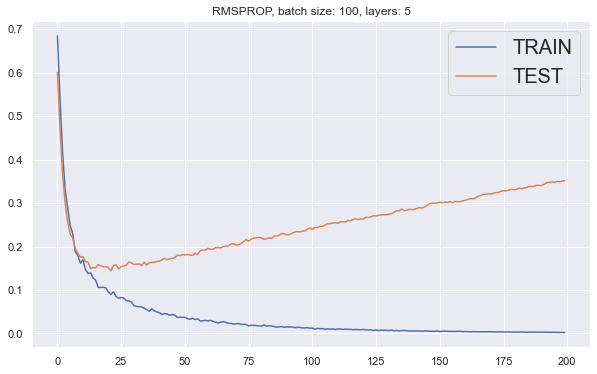

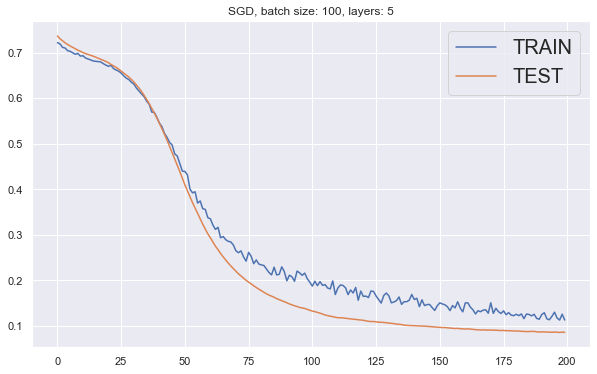

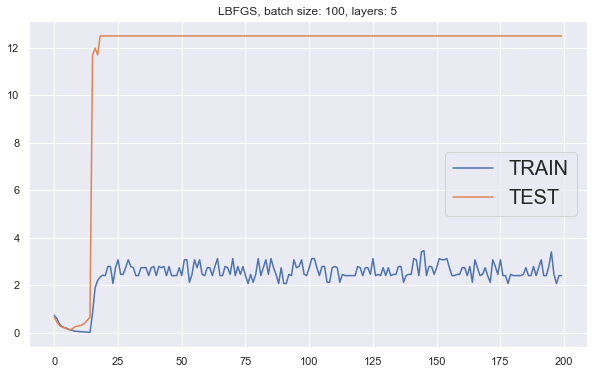

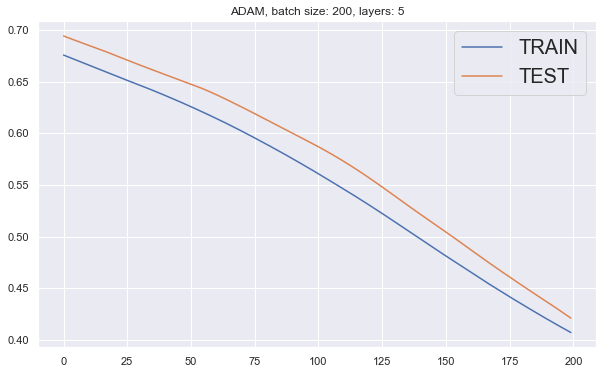

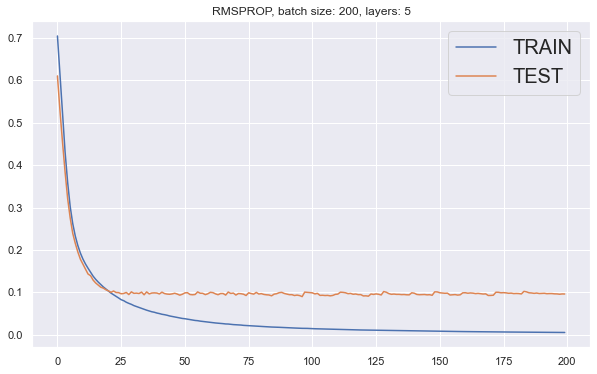

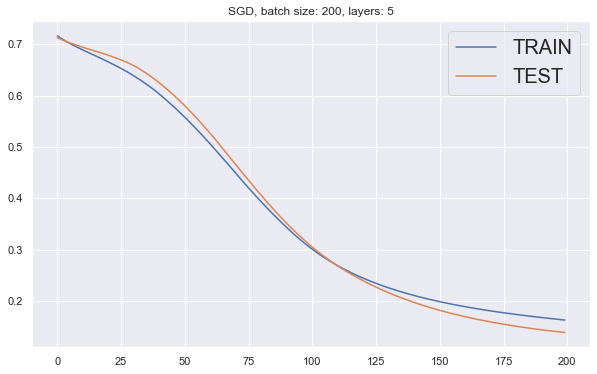

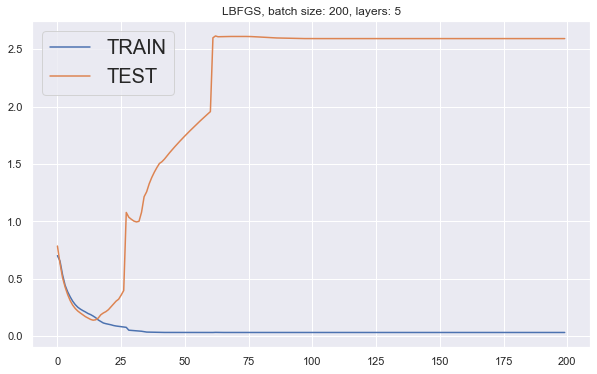

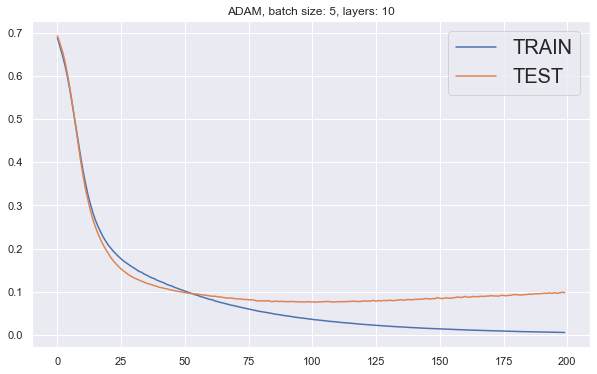

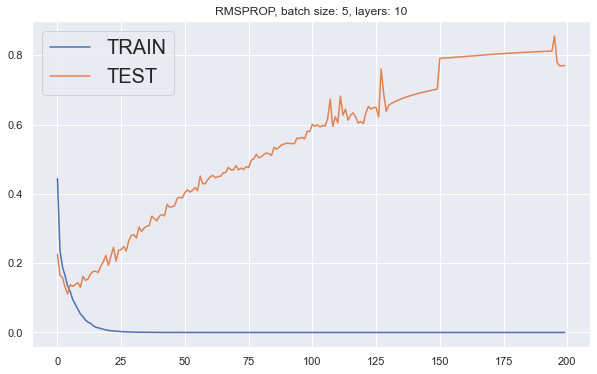

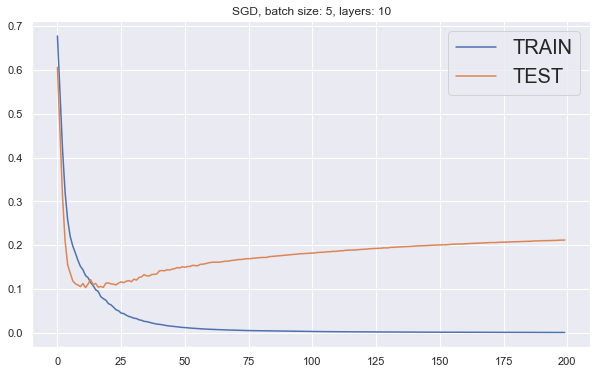

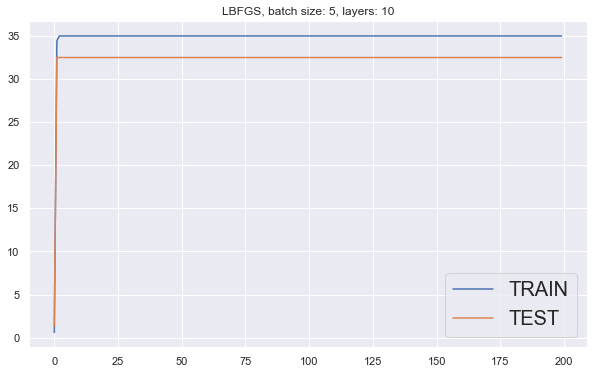

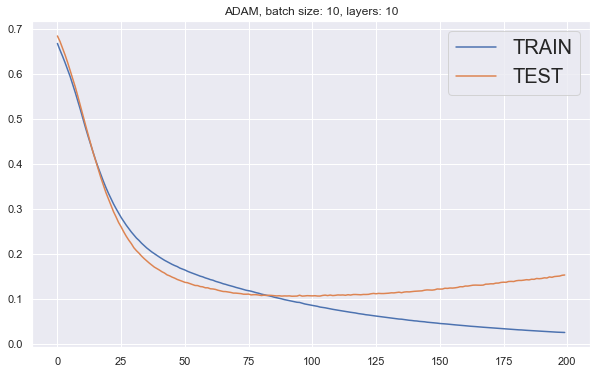

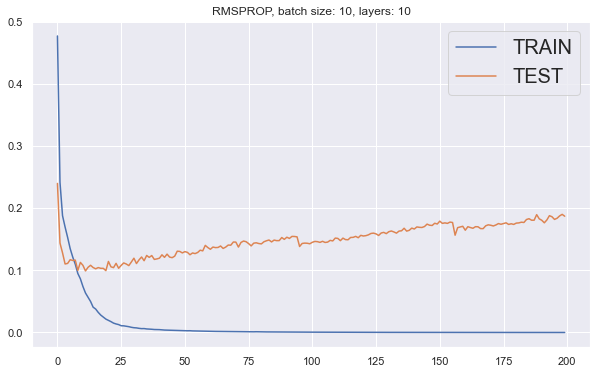

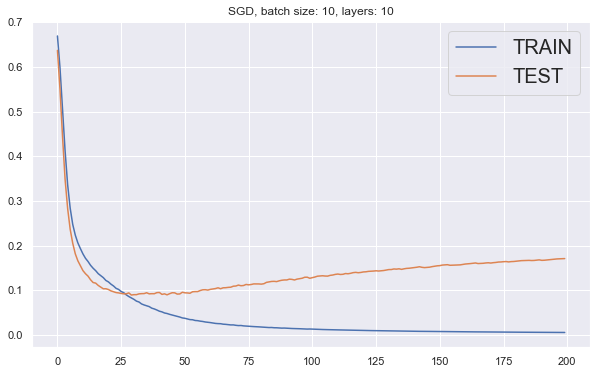

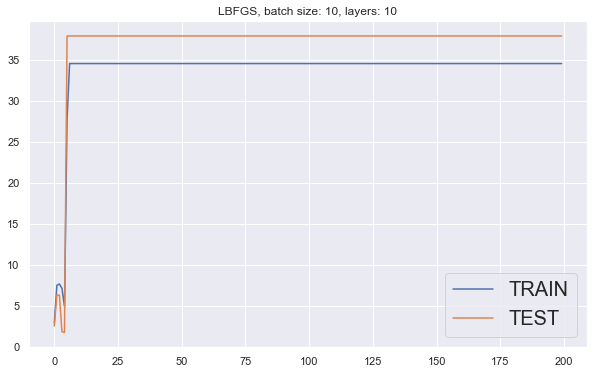

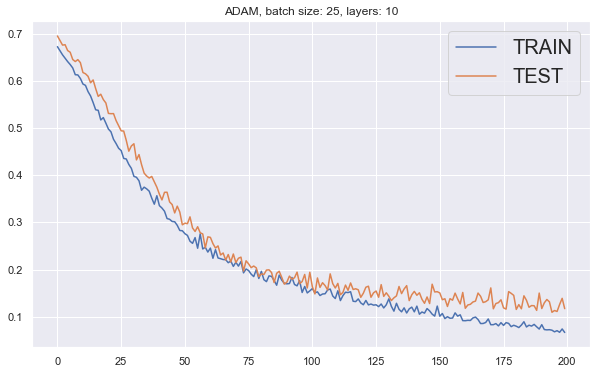

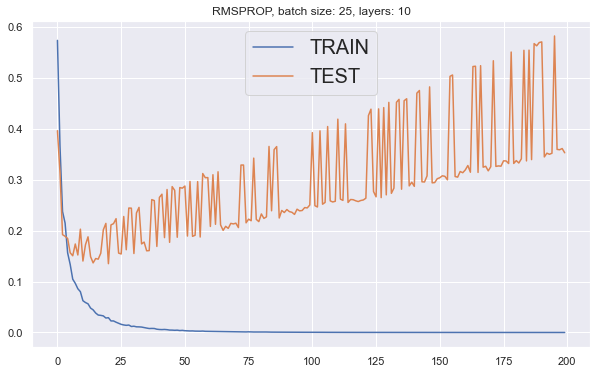

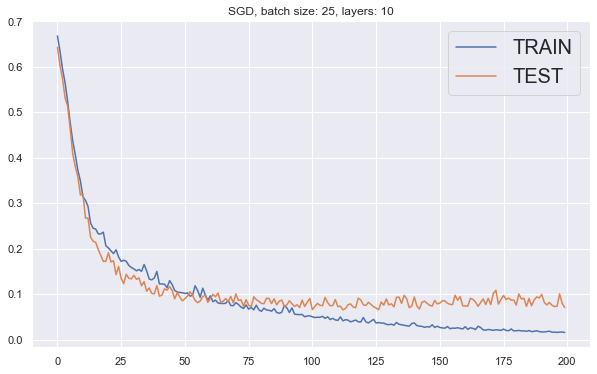

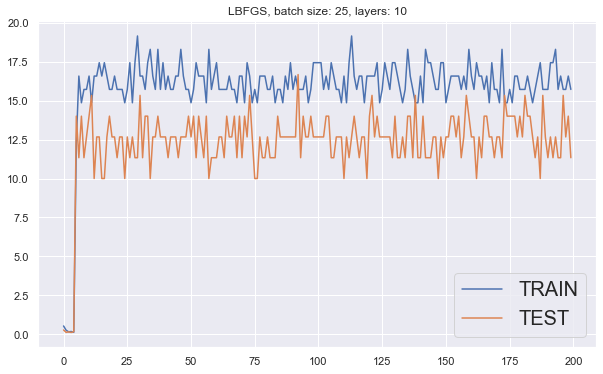

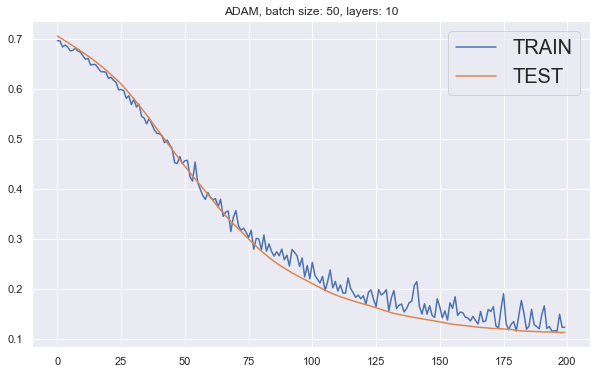

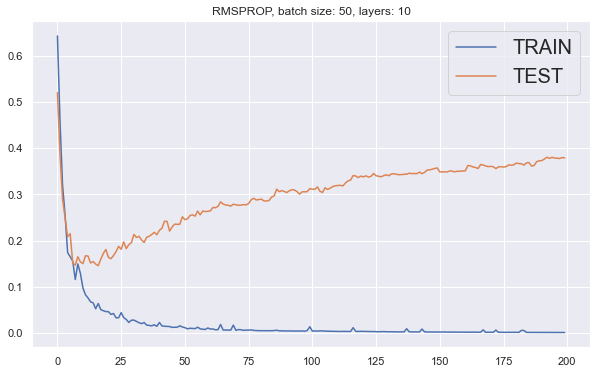

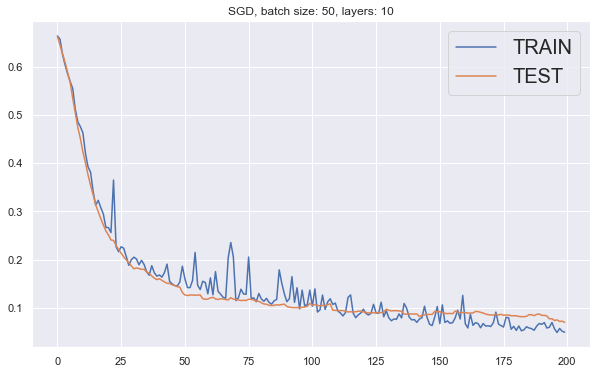

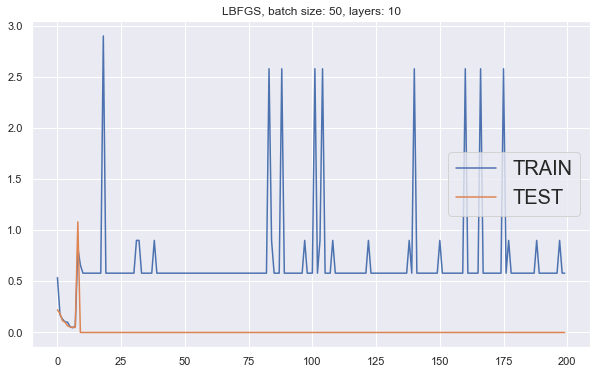

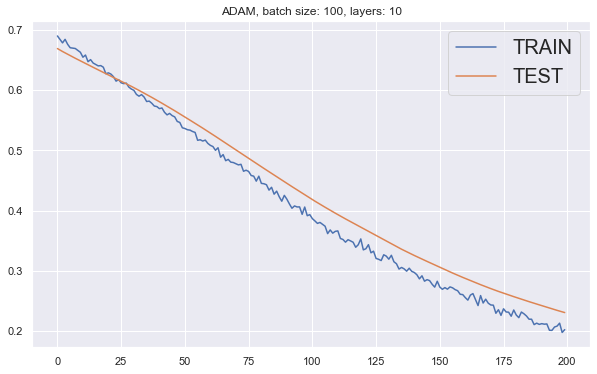

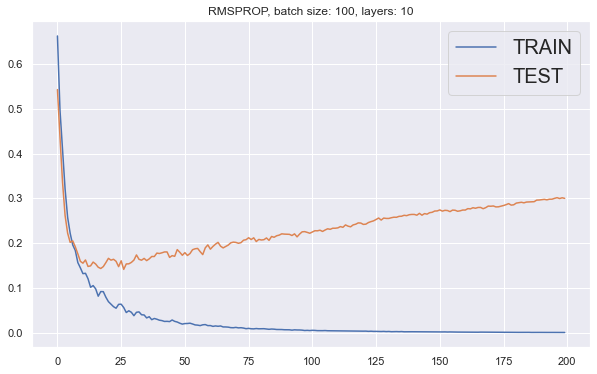

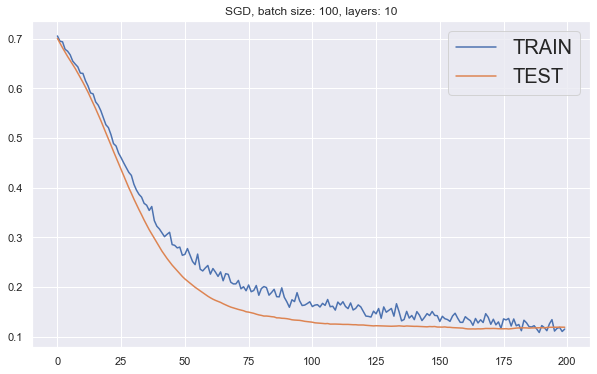

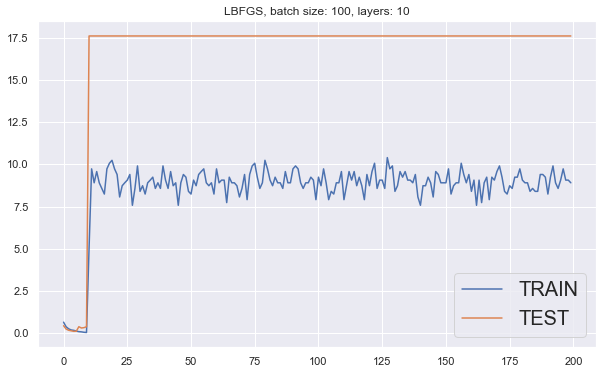

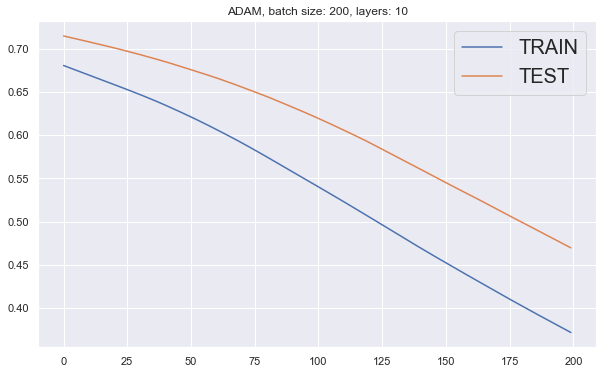

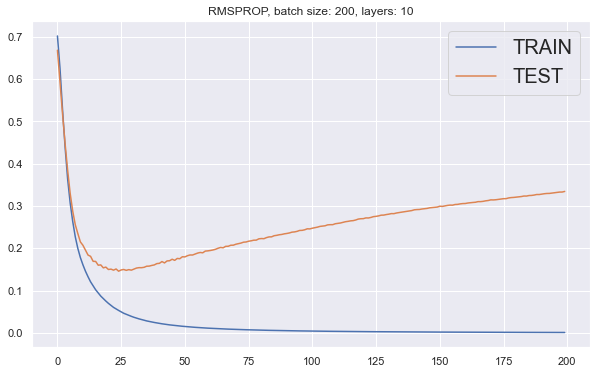

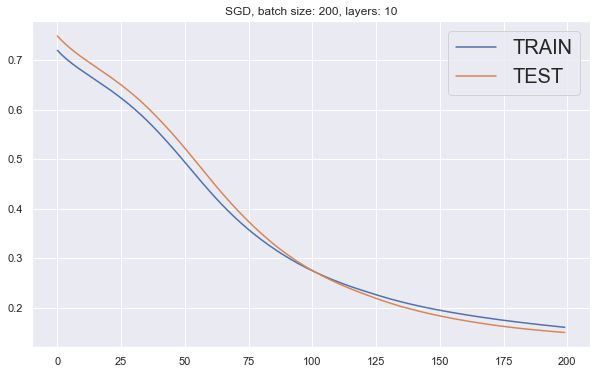

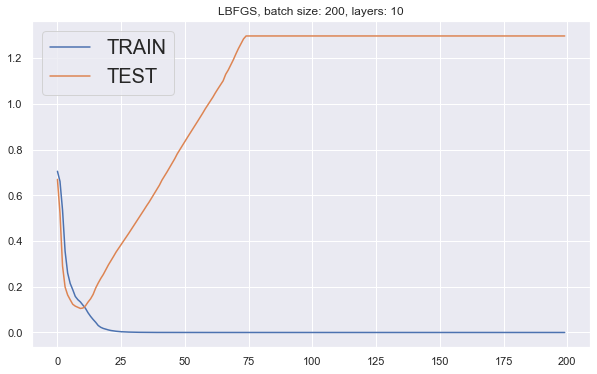

In [46]:
for layers in hidden_layers:
    for bs in batch_sizes:
        for j, optimal in enumerate(optimizers):
            model = MLP(20, layers)
            if optimal == torch.optim.SGD:
                optimizer = optimal(model.parameters(), 0.1)
            elif optimal == torch.optim.LBFGS :
                optimizer = optimal(model.parameters(), lr=1e-1, max_iter=3)
            else:
                optimizer = optimal(model.parameters())
            sns.set()
            # колво эпох. Меняйте
            n_epochs = 200

            # размер батча. Тоже меняйте если хотите
            batch_size = bs

            epoch_array = []
            epoch_test_array = []
            for epoch in range(n_epochs):

                # Тут игрушечный пример как делить на батчи
                permutation = torch.randperm(x_train.size()[0])
                loss_array = []

                model.train()
                for i in range(0,x_train.size()[0], batch_size):

                    #  your code here 


                    # Бьем на батчи. В таком мигрушечном примере это не обязательно, но мы будем делать все по феншую
                    indices = permutation[i:i+batch_size]
                    batch_x, batch_y = x_train[indices], y_train[indices]

                    def closure():
                        optimizer.zero_grad()
                        outputs = model.forward(batch_x)
                        loss = criterion(outputs.squeeze(), batch_y)

                        #loss_array.append(loss.item())
                        loss.backward()
                        return loss

                    # Считаем лосс и добавляем его значение в массив
                    outputs = model.forward(batch_x)
                    loss = criterion(outputs.squeeze(), batch_y)
                    loss_array.append(loss.item())
                    loss.backward()

                    if optimal == torch.optim.LBFGS:
                        error = optimizer.step(closure)
                        loss_array.append(error.item())
                    else:

                        optimizer.zero_grad()
                        outputs = model.forward(batch_x)
                        loss = criterion(outputs.squeeze(), batch_y)
                        loss_array.append(loss.item())
                        loss.backward()
                        #  your code here 
                        optimizer.step()


                # Будем проверять как отрабатывает модель на тестовом датасете (ЗАЧЕМ?)
                # ТАк еж разбиваем на батчи, считаем лосс, но веса модели не обновляем
                test_permutation = torch.randperm(x_test.size()[0])
                loss_test_array = []
                model.eval()
                for i in range(0,x_test.size()[0], batch_size):

                    indices = test_permutation[i:i+batch_size]
                    batch_x, batch_y = x_test[indices], y_test[indices]
                    outputs = model.forward(batch_x)
                    loss = criterion(outputs.squeeze(), batch_y)
                    loss_test_array.append(loss.item())

                # усредняем лосс на обучении и тесте по эпохе  и выводим график
                epoch_array.append(np.mean(loss_array))
                epoch_test_array.append(np.mean(loss_test_array))

            plt.figure(figsize =(10, 6))
            plt.plot(epoch_array, label ="TRAIN")
            plt.plot(epoch_test_array, label ="TEST")
            plt.legend(loc="best", fontsize=20)
            plt.title(names[j] + f", batch size: {batch_size}, layers: {layers}")
            plt.show()

ОПИШИТЕ ПОЛУЧЕНННЫЕ РЕЗУЛЬТАТЫ

Были проведены эксперименты с разными оптимизаторами и размерами батча. Опишем полученные результаты.

***АДАМ***
Показался мне наиболее универсальным алгоритмом:

1. Не имеет тенденции к переобучению.

2. Лучше всего работает при маленьких батчах ~5-10. Имеет на них минимальную ошибку ~0.1

3. Для такого результата необходимо ~100 эпох.

4. Чем больше скрытых слоев - тем лучше. При 10 слоях показывает ошибку < 0.1.

***RMSPROP***
Быстро обучается, вследствие этого имеет тендецию  к переобучению.

1. Переобучение появляется не всегда, чаще возникает при небольших батчах ~5-10.

2. Лучше всего показывает себя на батчах размера ~25 + , ошибка такая же, примерно как и у ADAM, к тому же на таких батчах менее склонен к переобучению. Большие батчи уменьшают переобучение и не сильно сказываются на результатах.

3. Чем больше батчи, тем больше нужно эпох (при 200 батчах - ~50, при маленьких ~5 - менее 10 эпох)

4. Размер скрытого слоя не сильно влияет.

***SGD***
По поведению нечто между ADAM и RMSPROP.

1. Аналогично, переобучение при маленьких батчах.

2. Лучше показывает результат на средних батчах ~50-100. Но необходимо больше эпох.

3. Чем больше скрытых слоев - тем лучше.

***LBFGS***
Самый тонко работающий алгоритм.

1. При маленьких батчах отказывается работать.

2. Результат начинает появляться при батчах 100-200. Наиболее хорошо работает вообще без батчей.

3. Мне показалось, что при маленьких размерах скрытого слоя алгоритм работает лучше.

4. При адекватных батчах или их отсутствии почти не склонен к переобучению.

***RELU***

Функция активации. Является нелинейной, используется в скрытых слоях. Ведет себя, как линейная при положительных значениях, и как 0 при отрицательных. Иногда для того, чтобы не получать 0 градиент, определяют линейно с очень большим уклоном(почти параллельной оси иксов).